# **Netflix & Chill... or Fail? Unpacking the Link Between Netflix and Grades**

![Netflix Photo](https://cinemafaith.com/wp-content/uploads/2016/03/netflix-2-final-2.jpg)

# **1. Problem Statement**

In this project, we aim to decode the complex relationship between student entertainment habits and academic performance. Given the overwhelming prevalence of daily digital media consumption, particularly Netflix, among students, we seek to identify the critical thresholds where entertainment transitions from harmless leisure to a detrimental factor for academic success.

By exploring key variable categories including academic factors (exam scores, study hours, attendance), entertainment habits (Netflix and social media consumption), lifestyle factors (sleep patterns, mental health ratings, and diet quality), and demographics (age, gender, and parental education levels), we hope to uncover the nuanced 'optimal range' where students can enjoy their digital lives without significant academic penalty. This analysis will provide data-driven insights to help students, educators, and parents navigate the digital landscape, fostering both well-being and academic achievement.

# **2. Date Set Description**
Our analysis is based on a robust dataset sourced from Kaggle, titled ["Student Habits vs Academic Performance."](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance) This dataset is particularly valuable as it represents real student data, offering a grounded basis for our research.

The dataset characteristics speak to its exceptional quality and suitability for our study: it comprises 1,000 complete records with zero missing values across 18 total variables. This ensures 100% data integrity for our analysis, providing a reliable foundation to explore how various student habits and demographics correlate with academic outcomes.

## **2.1 Initial Data Inspection**
Before diving deeper into analysis, it's important to perform an initial inspection of the dataset. This helps us understand its structure, identify potential issues (like missing data or incorrect types), and get a sense of the distributions. Here's what we look at:

- `df.shape` – Displays the number of rows and columns, giving a sense of dataset size.

- `df.head()` – Shows the first few rows to preview the format and sample values.

- `df.info()` – Lists column names, data types, and non-null counts, useful for detecting missing data or type mismatches.

- `df.describe()` – Provides summary statistics (mean, std, min, max, etc.) for numerical features, helping to identify potential outliers or skewed distributions.

These steps offer a foundational understanding before proceeding to data cleaning and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/3rd year 2024-25/Term 3/DT/student_habits_performance.csv')

In [4]:
df.shape

(1000, 16)

The initial data inspection shows that the dataset has 1000 records and 16 columns.

In [5]:
df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


A preview of the first 10 rows shows a mix of numerical and categorical data for various student attributes, including study habits, lifestyle factors, and demographics.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

Quick looks shows missing data: the parental_education_level column has only 909 non-null values, indicating 91 missing entries that will need to be handled.

In [7]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


- Ages range from 17 to 24 years old.
- The mean exam score is 69.60, with a standard deviation of 16.89. The scores range from a minimum of 18.4 to a maximum of 100.
- On average, students study for 3.55 hours per day, spend 1.82 hours on Netflix, and get approximately 6.47 hours of sleep.
- The attendance_percentage is high on average at 84.13%.

# **3. Column Descriptions**
Here are the descriptions for each variable in the "Student Habits vs Academic Performance" dataset:

| Variable Name                 | Description                                                                 | Category             |
|------------------------------|-----------------------------------------------------------------------------|----------------------|
| `student_id`                 | Unique identifier for each student.                                         | N/A                  |
| `age`                        | Age of the student in years.                                                | Demographics         |
| `gender`                     | Gender of the student (e.g., Male, Female, Other).                          | Demographics         |
| `study_hours_per_day`        | Average number of hours a student spends studying per day.                  | Academic Factors     |
| `social_media_hours`         | Average number of hours a student spends on social media per day.           | Entertainment Habits |
| `netflix_hours`              | Average number of hours a student spends watching Netflix per day.          | Entertainment Habits |
| `part_time_job`              | Indicates whether the student has a part-time job (e.g., Yes, No).          | Lifestyle Factors    |
| `attendance_percentage`      | Percentage of classes attended by the student.                              | Academic Factors     |
| `sleep_hours`                | Average number of hours a student sleeps per night.                         | Lifestyle Factors    |
| `diet_quality`               | Self-reported rating of diet quality (e.g., Poor, Fair, Good, Excellent).   | Lifestyle Factors    |
| `exercise_frequency`         | How often a student exercises (e.g., Never, Rarely, Sometimes, Often, Always). | Lifestyle Factors |
| `parental_education_level`   | Highest education level achieved by parents (e.g., High School, Bachelor's, Master's, PhD). | Demographics |
| `internet_quality`           | Self-reported rating of internet quality (e.g., Poor, Fair, Good, Excellent). | Lifestyle Factors  |
| `mental_health_rating`       | Self-reported rating of mental health (e.g., Poor, Fair, Good, Excellent).  | Lifestyle Factors    |
| `extracurricular_participation` | Indicates whether the student participates in extracurricular activities (e.g., Yes, No). | Academic Factors |
| `exam_score`                 | The student's final exam score, representing academic performance. This is the primary dependent variable. | Academic Factors |


# **4. Data Cleaning & Integrity Check**
Before diving into the analysis, it's crucial to ensure our data is clean and reliable. This involves checking for missing values, duplicate entries, appropriate data types, and understanding the basic statistical properties of our numerical variables.

## **4.1 Missing Values**

In [8]:
# Check for Missing Values
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


Missing values for Parental Education. To handle the missing data, the null values in the parental_education_level column were filled with the string 'Unknown'.

In [9]:
# Fill missing parental education level with Unknown
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

# Check if there are still missing values
df.isnull().sum()

,0
student_id,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
diet_quality,0


A second check confirms the dataset has no more missing values.

## **4.2 Duplicate Rows**
The code df.duplicated().value_counts() provides a summary of unique versus duplicate rows in the dataset.

df.duplicated(): First, this function scans the DataFrame and marks each row as False if it is unique (or its first appearance) and True if it is a duplicate of a preceding row.
.value_counts(): This function then counts the total number of False and True occurrences from the previous step.

In [34]:
df.duplicated().value_counts()

,count
False,1000


The result False 1000 indicates that all 1000 rows are unique, which confirms there are no duplicate rows in the dataset.

## **4.3 Data Types**
Checking data types with df.info() confirms that numerical columns are correctly set as float64 or int64 for calculations. It also identifies object columns, which are often converted to the more memory-efficient category type to improve performance.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

The code converts columns with the object data type (like gender and diet_quality) to the more efficient category type. This is an optimization to save memory and improve performance on subsequent analyses.

In [12]:
# Converting Object columns to categorical, excluding 'student_id'
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
  if col != 'student_id':
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   student_id                     1000 non-null   object  
 1   age                            1000 non-null   int64   
 2   gender                         1000 non-null   category
 3   study_hours_per_day            1000 non-null   float64 
 4   social_media_hours             1000 non-null   float64 
 5   netflix_hours                  1000 non-null   float64 
 6   part_time_job                  1000 non-null   category
 7   attendance_percentage          1000 non-null   float64 
 8   sleep_hours                    1000 non-null   float64 
 9   diet_quality                   1000 non-null   category
 10  exercise_frequency             1000 non-null   int64   
 11  parental_education_level       1000 non-null   category
 12  internet_quality               1000

# **4.5 Data Integrity Check**
Range Validation:
- age should be within a realistic student range (e.g., 15–30).
- attendance_percentage should be between 0 and 100.
- exam_score should be within the exam scale (e.g., 0–100).

Uniqueness:
- Check that student_id is unique.

In [14]:
# Age Validation
# 1. Set the acceptable age range
age_min = 15
age_max = 30

# 2. Find ALL rows with invalid ages in ONE operation
invalid_age = df[(df['age'] < age_min) | (df['age'] > age_max)]

# 3. Check if any invalid ages were found
if not invalid_age.empty:
    # If yes, print and show the bad rows
    print(f"Found {len(invalid_age)} rows with age outside the range {age_min}-{age_max}:")
    print(invalid_age[['student_id', 'age']])
else:
    # If no invalid ages, print success message
    print(f"All ages are within the realistic student range ({age_min}-{age_max}).")

All ages are within the realistic student range (15-30).


In [15]:
# Attendance Validation
attendance_min = 0
attendance_max = 100
invalid_attendance = df[(df['attendance_percentage'] < attendance_min) | (df['attendance_percentage'] > attendance_max)]
if not invalid_attendance.empty:
    print(f"Found {len(invalid_attendance)} rows with attendance outside the range {attendance_min}-{attendance_max}:")
    print(invalid_attendance[['student_id', 'attendance_percentage']])
else:
    print(f"All attendance percentages are within the valid range ({attendance_min}-{attendance_max}).")

print()

All attendance percentages are within the valid range (0-100).



In [16]:
# Exam Validation
exam_min = 0
exam_max = 100
invalid_exam = df[(df['exam_score'] < exam_min) | (df['exam_score'] > exam_max)]
if not invalid_exam.empty:
    print(f"Found {len(invalid_exam)} rows with exam score outside the range {exam_min}-{exam_max}:")
    print(invalid_exam[['student_id', 'exam_score']])
else:
    print(f"All exam scores are within the valid range ({exam_min}-{exam_max}).")

print()

All exam scores are within the valid range (0-100).



In [17]:
# Student ID Uniqueness
# 1. Find duplicate student IDs
duplicate_ids = df[df.duplicated(subset=['student_id'], keep=False)]

# 2. Check if there are duplicates
# If there are, print count
if not duplicate_ids.empty:
    print(f" Found {len(duplicate_ids)} rows with duplicate student IDs:")
    print(duplicate_ids[['student_id']].sort_values('student_id'))

# If there are none, print success message
else:
    print(f"All student IDs are unique.")

print()

All student IDs are unique.



# **5. Visualization**

### **5.1 Univariate Analysis: Student Profiling**

Daily Netflix Hours (netflix_hours)
- Purpose: To understand the distribution of the primary entertainment habit under investigation, revealing patterns of light, moderate, heavy, and extreme usage.
- Visualization: Histogram or Density Plot.

Exam Score (exam_score)
- Purpose: To visualize the distribution of academic performance, our key outcome variable.
- Visualization: Histogram or Density Plot.

Daily Study Hours (study_hours_per_day)
- Purpose: To understand the distribution of dedicated academic effort among students, a crucial input to performance.
- Visualization: Histogram or Density Plot.

Daily Sleep Hours (sleep_hours)
- Purpose: To profile students' sleep patterns, a significant lifestyle factor known to influence cognitive function and well-being, which in turn impacts academics.
- Visualization: Histogram or Density Plot.

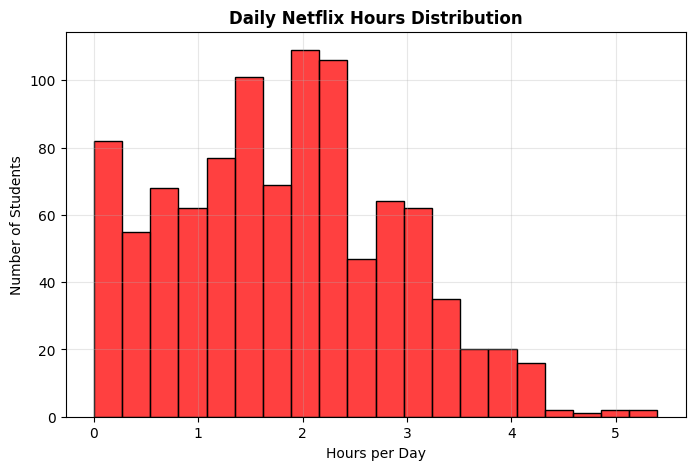

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['netflix_hours'], bins=20, color='red', edgecolor='black')

plt.title('Daily Netflix Hours Distribution', fontweight='bold')
plt.xlabel('Hours per Day')
plt.ylabel('Number of Students')
plt.grid(True, alpha=0.3)
plt.show()

**Daily Netflix Hours Distribution**
- Shape: The distribution is positively skewed (or right-skewed). This indicates that while most students watch a smaller number of hours, a few watch for much longer, creating a "tail" extending to the right.
- Central Tendency: The majority of students watch between 0 and 3 hours per day, with the most common viewing time centered around 2 hours daily.
- Binge-Watching: Based on this data, widespread daily binge-watching is not the norm. The number of students drops off sharply after 3 hours, indicating that extreme daily viewing (4+ hours) is rare.

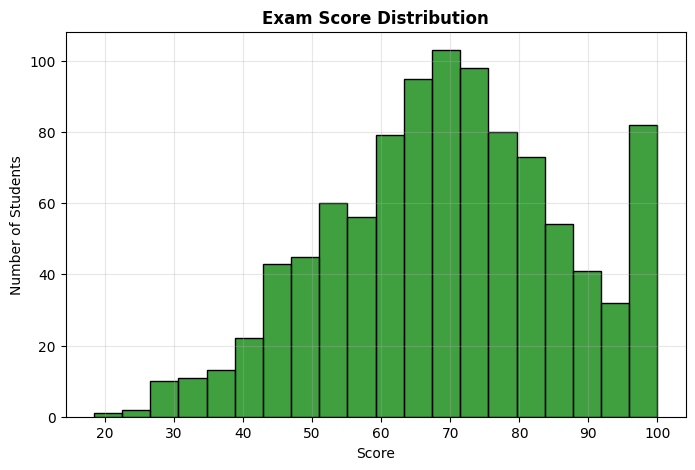

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], bins=20, color='green', edgecolor='black')

plt.title('Exam Score Distribution', fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Number of Students')
plt.grid(True, alpha=0.3)
plt.show()

**Exam Score Distribution**
- Shape: The distribution of exam scores roughly forms a bell curve, suggesting a normal distribution of grades, which is common for a large student group.
- entral Tendency: The majority of students scored between 60 and 80, with the highest concentration of scores centered around the 70-point mark.
- Range and Key Features: The scores are widely spread from a low of about 20 to a high of 100. There is also a notable peak of students scoring near 100, suggesting a significant group of high-achievers.

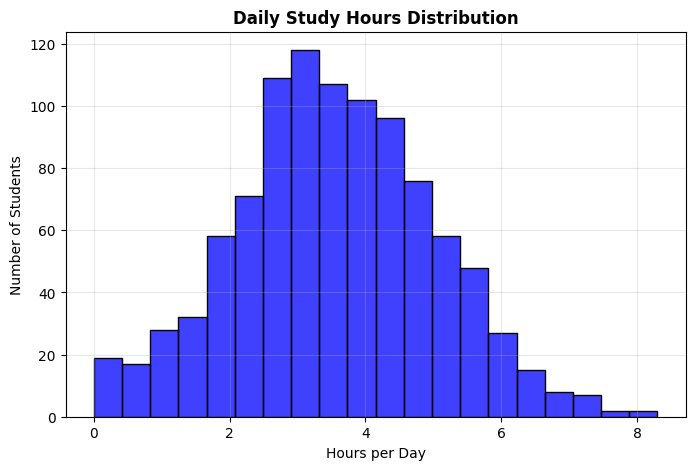

In [20]:
plt.figure(figsize=(8, 5))
sns.histplot(df['study_hours_per_day'], bins=20, color='blue', edgecolor='black')

plt.title('Daily Study Hours Distribution', fontweight='bold')
plt.xlabel('Hours per Day')
plt.ylabel('Number of Students')
plt.grid(True, alpha=0.3)
plt.show()

**Exam Score Distribution**
- Shape: The distribution of exam scores roughly forms a bell curve, suggesting a normal distribution of grades, which is common for a large student group.
- Central Tendency: The majority of students scored between 60 and 80, with the highest concentration of scores centered around the 70-point mark.
- Range and Key Features: The scores are widely spread from a low of about 20 to a high of 100. There is also a notable peak of students scoring near 100, suggesting a significant group of high-achievers.

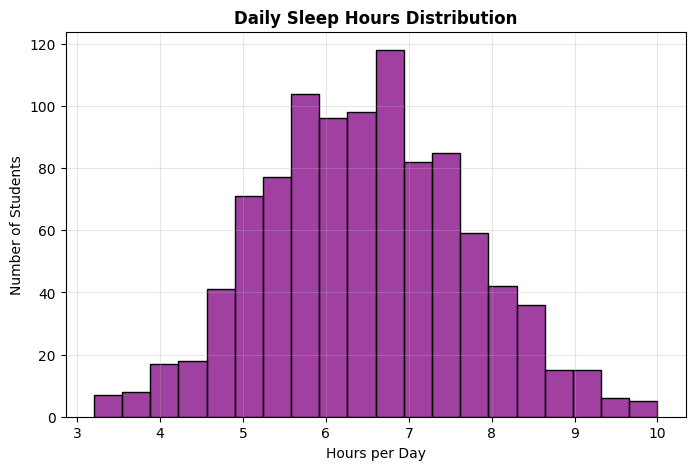

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours'], bins=20, color='purple', edgecolor='black')

plt.title('Daily Sleep Hours Distribution', fontweight='bold')
plt.xlabel('Hours per Day')
plt.ylabel('Number of Students')
plt.grid(True, alpha=0.3)
plt.show()

**Daily Study Hours Distribution**
- Shape: The distribution is unimodal and roughly symmetrical, closely approximating a bell curve. This suggests a strong central tendency in study habits.
- Central Tendency: The most frequent study duration (the peak of the curve) occurs between 3 and 3.5 hours per day.
- Range: The data spreads from nearly 0 to 8 hours, with very few students at the extremes of the distribution (studying for less than 1 hour or more than 6 hours).

### **5.2 Segmenting Students by Netflix Viewing Habits**

In this section, students are **segmented into categories** based on their daily Netflix viewing hours — from *"No Netflix"* to *"Extreme (>3h)"* usage. This categorization allows us to analyze patterns in academic performance across different levels of screen time.

We visualize:

* The **distribution** of students in each Netflix usage category (via pie and bar charts).
* The **variation and central tendency** of exam scores within each group using a box plot.
* **Mean exam scores** are labeled to highlight performance differences between segments.

This analysis helps reveal whether increased entertainment time corresponds to changes in academic outcomes, supporting data-driven insights into media habits and student success.


In [26]:
# Categorize Netflix viewing into labels
def categorize_netflix(hours):
    if hours == 0:
        return 'No Netflix'
    elif hours <= 1:
        return 'Light (≤1h)'
    elif hours <= 2:
        return 'Moderate (1-2h)'
    elif hours <= 3:
        return 'Heavy (2-3h)'
    else:
        return 'Extreme (>3h)'

# Apply the function to create a new column
df['netflix_category'] = df['netflix_hours'].apply(categorize_netflix)

# Count students in each category
category_counts = df['netflix_category'].value_counts()
print("Netflix category distribution:")
print(category_counts)


Netflix category distribution:
netflix_category
Moderate (1-2h)    323
Heavy (2-3h)       271
Light (≤1h)        208
Extreme (>3h)      139
No Netflix          59
Name: count, dtype: int64


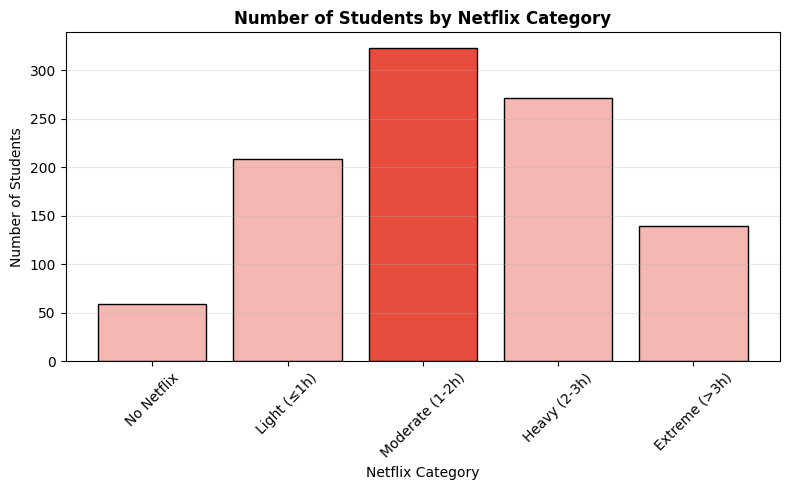

In [27]:
# Define order from No Netflix to Extreme
category_order = ['No Netflix', 'Light (≤1h)', 'Moderate (1-2h)', 'Heavy (2-3h)', 'Extreme (>3h)']

# Count categories
counts = df['netflix_category'].value_counts()
top_category = counts.idxmax()

# Colors: red for top category, pink for others
colors = ['#e74c3c' if cat == top_category else '#f5b7b1' for cat in category_order]

# Plot bars with logical order
plt.figure(figsize=(8, 5))
bars = plt.bar(category_order, [counts[cat] for cat in category_order], color=colors, edgecolor='black')

plt.title('Number of Students by Netflix Category', fontweight='bold')
plt.xlabel('Netflix Category')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

- This bar chart displays the number of students in each defined Netflix viewing category.
- The 'Moderate (1-2h)' category is the most common, representing the largest group of students.
- This confirms that widespread daily binge-watching is not the norm, as the 'Extreme (>3h)' category is one of the smallest groups.

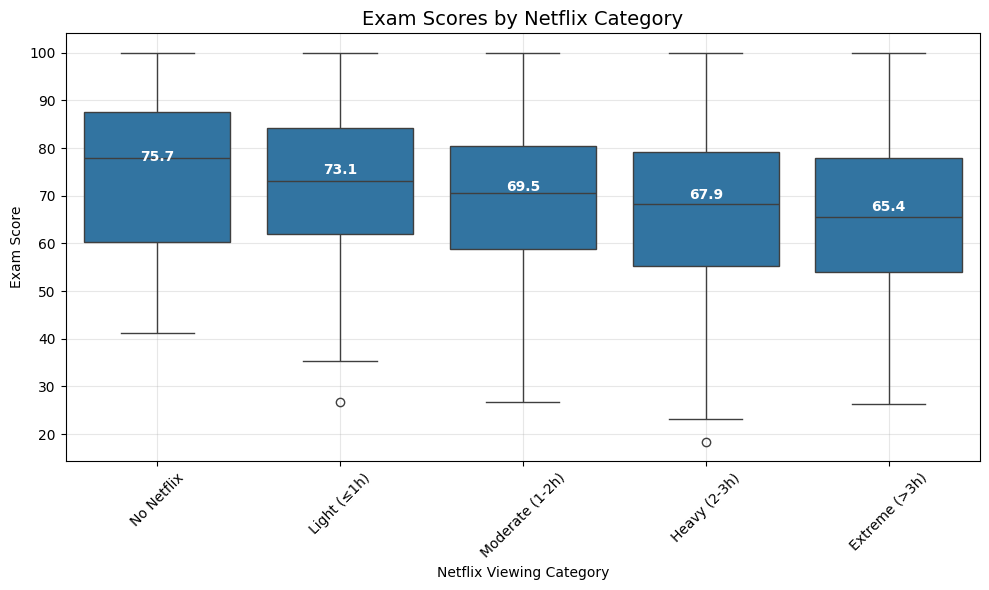

In [28]:
plt.figure(figsize=(10, 6))
box = sns.boxplot(data=df, x='netflix_category', y='exam_score', order=category_order)

light_pink = '#f5b7b1'
for patch in box.artists:
    patch.set_facecolor(light_pink)
    patch.set_edgecolor('black')
    patch.set_alpha(1)

mean_scores = df.groupby('netflix_category')['exam_score'].mean()
for i, category in enumerate(category_order):
    if category in mean_scores:
        mean_val = mean_scores[category]
        plt.text(i, mean_val + 1.5, f'{mean_val:.1f}',
                 ha='center', fontweight='bold', color='white')

plt.title("Exam Scores by Netflix Category", fontsize=14)
plt.xlabel("Netflix Viewing Category")
plt.ylabel("Exam Score")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


This chart compares the distribution of exam scores across five different Netflix viewing categories, from "No Netflix" to "Extreme (>3h)". The white number inside each box is the mean (average) exam score for that group.

The most important insight from this plot is the clear downward trend in academic performance as Netflix consumption increases.

- As you move from left to right across the categories, the boxes systematically shift lower. The mean score for the "No Netflix" group is 75.7, while the mean for the "Extreme (>3h)" group drops to 65.4.
- This trend strongly suggests that students who watch more Netflix tend to have lower median and average exam scores.

### **5.3 Bivariate Analysis: Correlation Heatmap**

Our correlation heatmap provides a powerful overview of the relationships between all numerical variables in our dataset. The color intensity and the value in each cell indicate the strength and direction of the correlation (from -1 to 1).

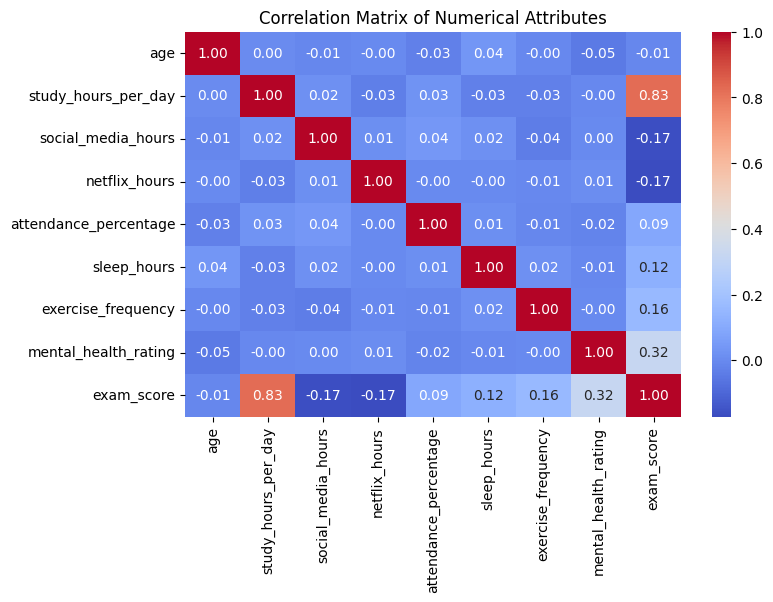

In [22]:
plt.figure(figsize=(8, 5))

# Select numerical columns for correlation
numerical_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
                  'attendance_percentage', 'sleep_hours', 'exercise_frequency',
                  'mental_health_rating', 'exam_score']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Simple correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Title
plt.title("Correlation Matrix of Numerical Attributes")
plt.show()

In [23]:
# Highlight key correlations with exam_score
exam_correlations = correlation_matrix['exam_score'].sort_values(ascending=False)
for var, corr in exam_correlations.items():
    if var != 'exam_score':
        direction = "📈 Positive" if corr > 0 else "📉 Negative"
        strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
        print(f"  • {var}: {corr:.3f} ({direction}, {strength})")

  • study_hours_per_day: 0.825 (📈 Positive, Strong)
  • mental_health_rating: 0.322 (📈 Positive, Moderate)
  • exercise_frequency: 0.160 (📈 Positive, Weak)
  • sleep_hours: 0.122 (📈 Positive, Weak)
  • attendance_percentage: 0.090 (📈 Positive, Weak)
  • age: -0.009 (📉 Negative, Weak)
  • social_media_hours: -0.167 (📉 Negative, Weak)
  • netflix_hours: -0.172 (📉 Negative, Weak)


- Highest Correlation: `study_hours_per_day` has the **strongest relationship, with a strong positive correlation of +0.83 with exam_score**. This indicates that as study time increases, exam scores tend to increase significantly.
- Netflix Correlation: `netflix_hours` shows a **weak negative correlation of -0.17 with exam_score**. This suggests a slight tendency for exam scores to decrease as Netflix viewing hours increase.

### **5.4 Bivariate Analysis: Visualizing Key Relationships**

This section uses scatter plots to visually explore the correlation between key behaviors and academic outcomes. The relationship between daily Netflix hours and performance is examined first, followed by an analysis of study hours versus exam scores.

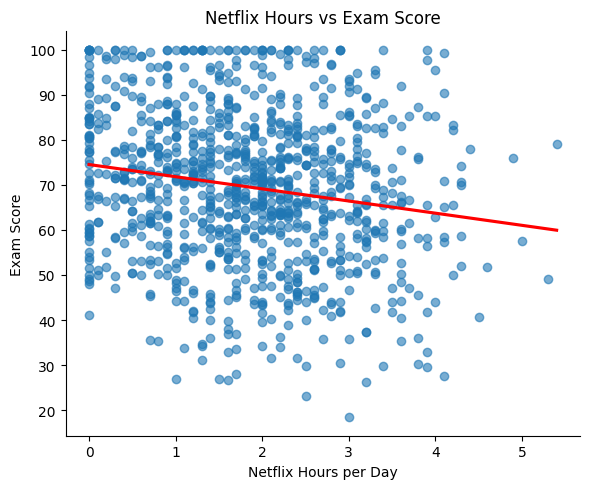

In [25]:
# Scatter + regression: Netflix Hours vs Exam Score
sns.lmplot(x='netflix_hours', y='exam_score', data=df, height=5, aspect=1.2,
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)

plt.title("Netflix Hours vs Exam Score")
plt.xlabel("Netflix Hours per Day")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()


**Scatter Plot: Netflix Hours vs. Exam Score**
This scatter plot visualizes the relationship between the hours spent watching Netflix and final exam scores.

- What this chart shows: Each dot represents an individual student, plotted according to their Netflix Hours per Day (x-axis) and their Exam Score (y-axis). The wide dispersion of the points indicates a weak relationship.
- The Regression Line: The red line is a linear regression line that represents the general trend in the data. Its slight downward slope visually confirms the weak negative correlation, suggesting that as Netflix viewing increases, exam scores have a slight tendency to decrease.

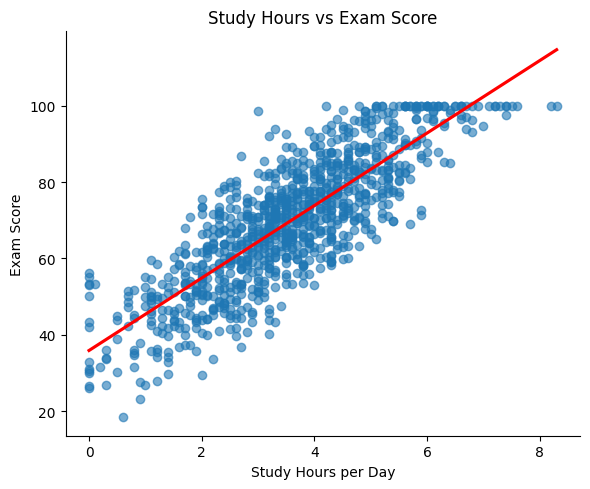

In [24]:
sns.lmplot(x='study_hours_per_day', y='exam_score', data=df, height=5, aspect=1.2,
           scatter_kws={'alpha':0.6}, line_kws={'color':'red'}, ci=None)

plt.title("Study Hours vs Exam Score")
plt.xlabel("Study Hours per Day")
plt.ylabel("Exam Score")
plt.tight_layout()
plt.show()

**Scatter Plot: Study Hours vs. Exam Score**
This scatter plot visualizes the relationship between the hours a student studies per day and their final exam score.

- What this chart shows: Each dot represents an individual student, positioned according to their Study Hours per Day (x-axis) and Exam Score (y-axis). The clear upward pattern of the dots from left to right visually demonstrates a strong positive correlation.
- The Regression Line: The red line is a linear regression line that statistically summarizes the trend. Its steep upward slope confirms the strong positive relationship, showing that as study hours increase, the predicted exam score also increases significantly.

# **7. Insights and Conclusion**
This project aimed to understand if watching Netflix negatively affects student grades. The analysis shows that while there is a connection, the most important factor for academic success is the amount of time spent studying.

**Key Findings:**

- Study Hours are Crucial: The data shows a strong, positive correlation between study hours and exam scores. Simply put, more study time is linked to better grades.

- Netflix Has a Negative Impact: There is a clear trend showing that as daily Netflix viewing increases, average exam scores decrease. This suggests that more screen time is associated with lower academic performance.

- Balance is the Deciding Factor: Students can enjoy a moderate amount of Netflix without a major negative impact, but only if it is balanced with sufficient study time. The real issue arises when entertainment time replaces study time.

In conclusion, watching Netflix doesn't guarantee failure, but prioritizing it over studying is a clear risk. The data shows that the best way to achieve high grades is to dedicate enough hours to studying. While moderate leisure is fine, excessive Netflix viewing is associated with lower scores.

# **Bonus: K-Means Clustering**

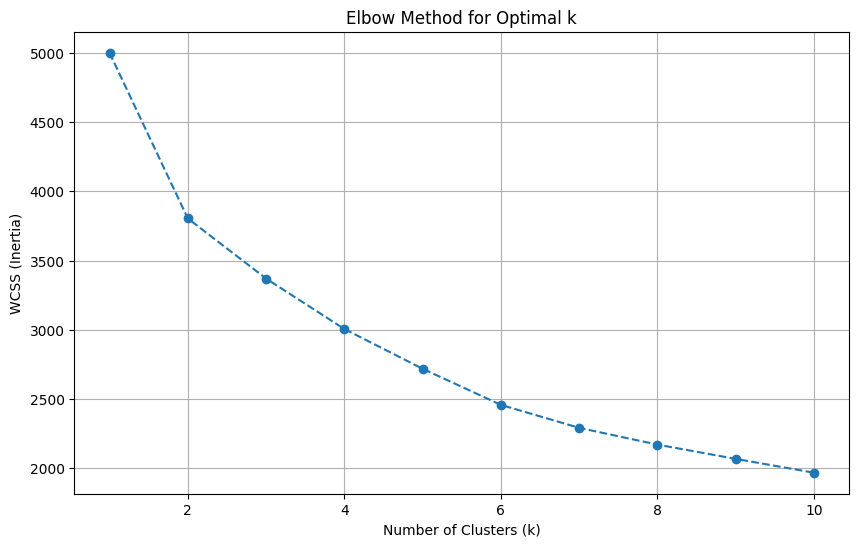


RUNNING ANALYSIS FOR K = 3
Cluster Analysis (Mean Values) for k=3:
            study_hours_per_day  social_media_hours  netflix_hours  \
cluster_k3                                                           
0                      4.721798            1.923978       1.690463   
1                      2.182235            2.251862       2.244413   
2                      3.716901            3.568662       1.464789   

            sleep_hours  exam_score  
cluster_k3                           
0              6.731880   85.416621  
1              6.490544   54.146705  
2              6.106690   68.156338  




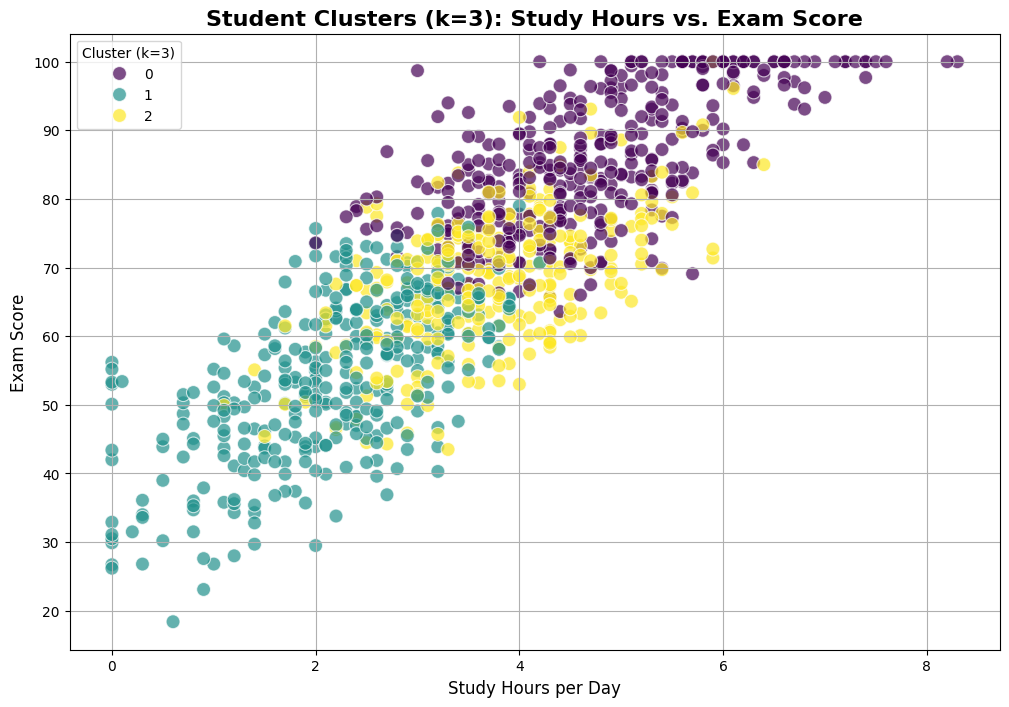

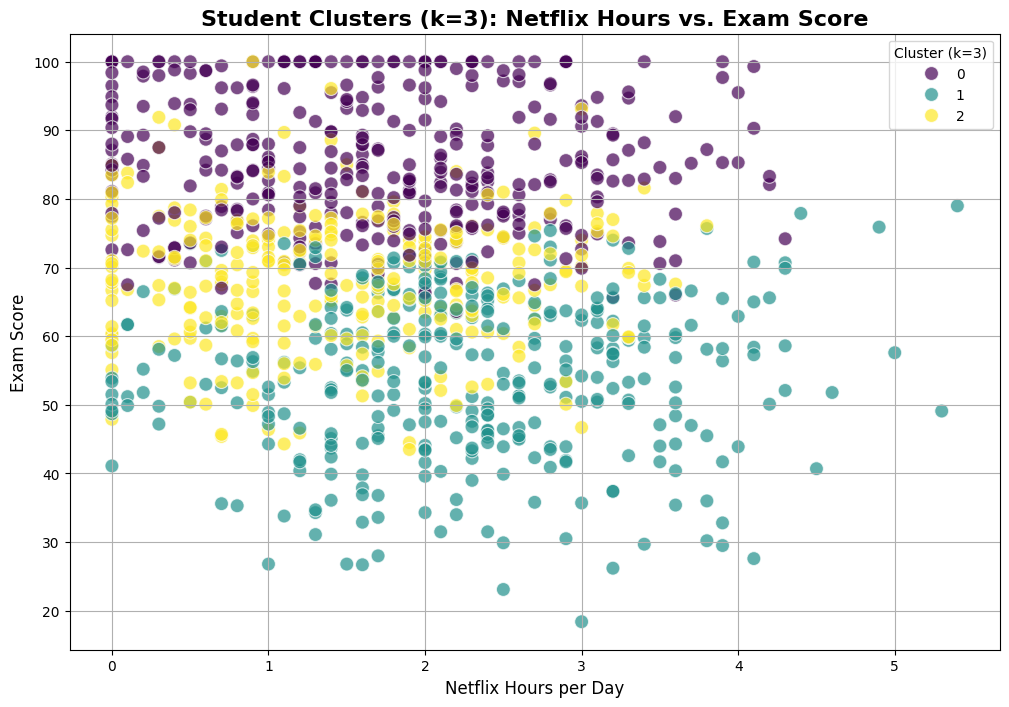

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- Step 1: Select Features for Clustering ---
# We select numerical columns that describe student behaviors and outcomes.
# The clusters will now be formed based on habits and exam scores together.
features_for_clustering = [
    'study_hours_per_day',
    'social_media_hours',
    'netflix_hours',
    'sleep_hours',
    'exam_score'
]

# Create a new DataFrame with only these features
X = df[features_for_clustering]

# --- Step 2: Scale the Data ---
# K-Means is sensitive to the scale of the data. We use StandardScaler
# to normalize the features, so each one has a mean of 0 and a standard
# deviation of 1. This ensures all features contribute equally to the clustering.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 3: Determine the Optimal Number of Clusters (k) using the Elbow Method ---
# We calculate the Within-Cluster Sum of Squares (WCSS) for different numbers
# of clusters (from 1 to 10). The 'elbow' point on the plot is a good
# indicator of the optimal number of clusters.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

# --- Function to run and visualize K-Means for a given k ---
def run_and_visualize_kmeans(k, data, scaled_data, features):
    """
    Runs K-Means clustering for a specified k and visualizes the results.
    """
    print(f"\n{'='*30}\nRUNNING ANALYSIS FOR K = {k}\n{'='*30}")

    # Apply K-Means with the chosen k
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)

    # Add cluster labels to a new column
    cluster_col_name = f'cluster_k{k}'
    data[cluster_col_name] = cluster_labels

    # Analyze and interpret the clusters
    cluster_analysis = data.groupby(cluster_col_name)[features].mean()
    print(f"Cluster Analysis (Mean Values) for k={k}:")
    print(cluster_analysis)
    print("\n")

    # --- Visualize the Clusters ---
    # Plot 1: Study Hours vs. Exam Score
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x='study_hours_per_day', y='exam_score', hue=cluster_col_name, palette='viridis', s=100, alpha=0.7)
    plt.title(f'Student Clusters (k={k}): Study Hours vs. Exam Score', fontsize=16, fontweight='bold')
    plt.xlabel('Study Hours per Day', fontsize=12)
    plt.ylabel('Exam Score', fontsize=12)
    plt.legend(title=f'Cluster (k={k})')
    plt.grid(True)
    plt.show()

    # Plot 2: Netflix Hours vs. Exam Score
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=data, x='netflix_hours', y='exam_score', hue=cluster_col_name, palette='viridis', s=100, alpha=0.7)
    plt.title(f'Student Clusters (k={k}): Netflix Hours vs. Exam Score', fontsize=16, fontweight='bold')
    plt.xlabel('Netflix Hours per Day', fontsize=12)
    plt.ylabel('Exam Score', fontsize=12)
    plt.legend(title=f'Cluster (k={k})')
    plt.grid(True)
    plt.show()


# --- Step 4 & 5: Run the analysis for k=3 ---
# Based on the comparison, k=3 provides the most interpretable results.
# The analysis will now be run for 3 clusters.

# Analysis for 3 clusters
run_and_visualize_kmeans(k=3, data=df, scaled_data=X_scaled, features=features_for_clustering)

To add another layer to the analysis, a K-Means clustering algorithm was used. This is a machine learning technique that automatically groups students into distinct profiles based on their shared habits and exam scores. By identifying these natural groupings, the main insights of the project can be reinforced with even stronger evidence.

### **Analysis of the Three Student Clusters**
The analysis identified three clear and distinct student profiles:

#### **Cluster 0: The High-Achievers (Purple)**

This group is defined by the highest study hours (average 4.7) and the highest exam scores (average 85.4).

Interestingly, their Netflix and social media usage is moderate, showing that they balance their hard work with a reasonable amount of leisure.

#### **Cluster 1: The At-Risk Students (Teal)**

This group has the lowest study hours (average 2.2) and the lowest exam scores (average 54.1).

They also have the highest Netflix consumption (average 2.2 hours), clearly illustrating the trade-off between entertainment and study time.

#### **Cluster 2: The Socializers (Yellow)**

This group represents the middle ground in academic performance, with an average exam score of 68.2.

Their defining characteristic is having the highest social media usage (average 3.6 hours), which appears to have a more significant negative impact on their study time than Netflix.

### **How Clustering Reinforces the Conclusion**
This clustering analysis powerfully reinforces the original conclusion. It moves beyond simple correlations to show that the student population naturally separates into groups where the trade-off between study time and entertainment is clear.

The scatter plots visually confirm this: the purple "High-Achievers" dominate the top-right (high study/high score), while the teal "At-Risk" students occupy the bottom-left (low study/low score) [cite: image_e6feee.png].

Ultimately, this bonus analysis proves that it's not just about one habit, but about the overall profile of a student. Those who prioritize studying consistently outperform those who dedicate more time to entertainment.